# Gene expression from mircoarrays 
#### (Breast cancer dataset: Breast_GSE10797)

In [1]:
# Standard modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ML-modules
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

# Metric for scoring model
from sklearn.metrics import f1_score, confusion_matrix, precision_score, recall_score

# Save model
import joblib

# Load dataset

In [2]:
# Read csv-file
data = pd.read_csv("Breast_GSE10797.csv", index_col="samples")
data.head(5)

,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
samples,,,,,,,,,,,,,,,,,,,,,
671,cancer_epithelial,6.421287,3.161197,1.965993,2.600064,2.157899,3.153408,2.012364,1.976855,1.609713,...,12.005226,12.476655,14.271008,13.855944,2.076140,1.875804,1.922314,2.050677,1.938257,1.737185
673,cancer_epithelial,6.715620,3.131431,2.624435,3.340376,2.214897,2.998384,2.377003,2.219821,1.667293,...,12.929805,12.694136,14.369922,14.290305,2.417179,1.884293,1.914287,2.037783,2.118252,1.917345
675,cancer_epithelial,7.019017,3.080859,2.977302,2.692181,2.023505,3.547079,2.354219,2.319934,2.793515,...,12.604099,12.620167,14.420994,14.285785,2.032913,1.903823,1.894262,1.866963,2.047231,1.954799
677,cancer_epithelial,7.595891,2.863032,2.499157,3.004193,2.033855,3.405192,2.346281,2.261241,1.931241,...,13.134787,13.002423,14.426406,14.303121,2.105099,1.922194,1.904258,1.902839,2.051988,1.995356
679,cancer_epithelial,7.312846,2.498788,2.064275,3.180191,2.011954,2.919717,2.099707,2.058700,1.742419,...,11.984974,11.990301,14.251174,14.217504,2.247308,2.275464,2.097682,2.064976,2.049793,2.060105


# Shape

In [3]:
# Check shape of dataset
data.shape

(66, 22278)

# Types of outcome

In [4]:
# Check different types of outcome
outcomes = data.value_counts("type")
print(outcomes)

type
cancer_epithelial    28
cancer_stroma        28
normal               10
Name: count, dtype: int64


# Create numeric categorical variables for "type" column

In [5]:
# Types of cancer assigned to number
data["type"] = data["type"].astype("category")

# Rename categories
data["type"] = data["type"].cat.rename_categories({
            "normal": 0, 
            "cancer_epithelial": 1, 
            "cancer_stroma": 2})

# Save as category
data["type"].astype("category")

# Save labels
labels = ["normal", "cancer_epithelial", "cancer_stroma"]

data.head(5)

,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
samples,,,,,,,,,,,,,,,,,,,,,
671,1,6.421287,3.161197,1.965993,2.600064,2.157899,3.153408,2.012364,1.976855,1.609713,...,12.005226,12.476655,14.271008,13.855944,2.076140,1.875804,1.922314,2.050677,1.938257,1.737185
673,1,6.715620,3.131431,2.624435,3.340376,2.214897,2.998384,2.377003,2.219821,1.667293,...,12.929805,12.694136,14.369922,14.290305,2.417179,1.884293,1.914287,2.037783,2.118252,1.917345
675,1,7.019017,3.080859,2.977302,2.692181,2.023505,3.547079,2.354219,2.319934,2.793515,...,12.604099,12.620167,14.420994,14.285785,2.032913,1.903823,1.894262,1.866963,2.047231,1.954799
677,1,7.595891,2.863032,2.499157,3.004193,2.033855,3.405192,2.346281,2.261241,1.931241,...,13.134787,13.002423,14.426406,14.303121,2.105099,1.922194,1.904258,1.902839,2.051988,1.995356
679,1,7.312846,2.498788,2.064275,3.180191,2.011954,2.919717,2.099707,2.058700,1.742419,...,11.984974,11.990301,14.251174,14.217504,2.247308,2.275464,2.097682,2.064976,2.049793,2.060105


# Split data

In [6]:
# Set seed
seed = 123

# X and y
X = data.drop(["type"], axis=1)
y = data["type"]

# Split data (stratify y due to skew in prevalence of types)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=seed, stratify=y)

# Logistic Regression

In [7]:
# Chosen model
from sklearn.linear_model import LogisticRegression

# Instansiate pipeline
logreg_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA(random_state=seed)),
    ("logreg", LogisticRegression(max_iter= 1000, multi_class="multinomial", random_state=seed, n_jobs= -1))
]) 

# Hyperparameters for logreg
logreg_params = {
    "pca__n_components": [5, 7, 9],
    "logreg__C": [0.1, 1],
}

# GridSearchCV with cv = 5
logreg = GridSearchCV(logreg_pipeline, param_grid=logreg_params, cv=5, verbose=0)

# Test model (logreg)

In [8]:
# Fit data to pipeline
logreg.fit(X_train, y_train)

# Best model
best_logreg_mdl = logreg.best_estimator_
best_logreg_params = logreg.best_params_

# Save logistic model
joblib.dump(best_logreg_mdl, "best_logreg_mdl.joblib")

['best_logreg_mdl.joblib']

# Best model hyperparameters (logreg)

In [9]:
print(best_logreg_params)

{'logreg__C': 1, 'pca__n_components': 9}


# Predict with best model (logreg)

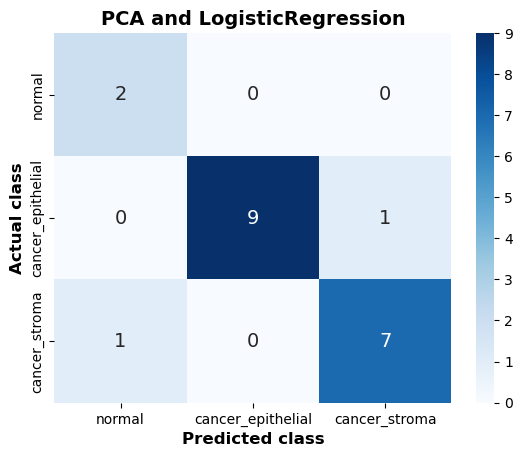

In [26]:
# Predict y_pred from X_test
y_pred_logreg = best_logreg_mdl.predict(X_test)

# Recall and precision
logreg_recall = recall_score(y_pred_logreg, y_test, average="weighted")
logreg_precision = precision_score(y_pred_logreg, y_test, average="weighted")

# Evaluate score
logreg_confusion = confusion_matrix(y_pred_logreg, y_test)

# Display confusion matrix with heatmap
sns.heatmap(logreg_confusion, annot=True, cmap="Blues", annot_kws={"fontsize": 14})
plt.title("PCA and LogisticRegression", fontsize = 14, fontweight = "bold")
plt.xlabel("Predicted class", fontsize = 12, fontweight = "bold")
plt.ylabel("Actual class", fontsize = 12, fontweight = "bold")
plt.xticks(np.arange(3)+0.5, ["normal", "cancer_epithelial", "cancer_stroma"])
plt.yticks(np.arange(3)+0.5, ["normal", "cancer_epithelial", "cancer_stroma"])
plt.show()

# SVC

In [11]:
# Chosen model
from sklearn.svm import SVC

# Instansiate pipeline
svc_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA(random_state=seed)),
    ("svc", SVC(random_state=seed))
]) 

# Hyperparameters for SVC
svc_params = {
    "svc__C": [0.1, 1, 10],
}

# GridSearchCV with cv = 5
svc = GridSearchCV(svc_pipeline, param_grid=svc_params, cv=5, verbose=0)

# Test model (SVC)

In [ ]:
# Fit data to pipeline
svc.fit(X_train, y_train)

# Best model
best_svc_mdl = svc.best_estimator_
best_svc_params = svc.best_params_

# Save SVC model
joblib.dump(best_svc_mdl, "best_svc_mdl.joblib")

['best_svc_mdl.joblib']

# Best model hyperparameters (SVC)

In [13]:
print(best_svc_params)

{'svc__C': 10}


# Predict with best model (SVC)

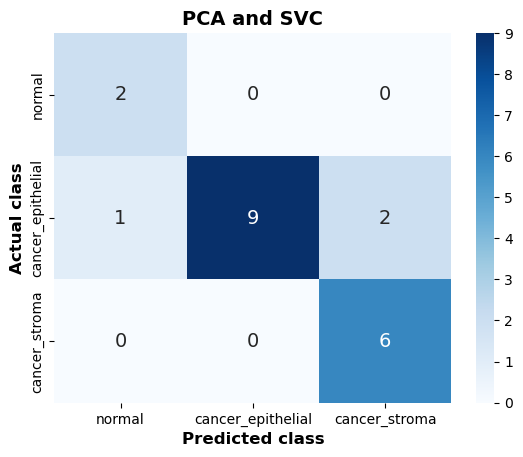

In [25]:
# Predict y_pred from X_test
y_pred_svc = best_svc_mdl.predict(X_test)

# Recall and precision
svc_recall = recall_score(y_pred_svc, y_test, average="weighted")
svc_precision = precision_score(y_pred_svc, y_test, average="weighted")

# Evaluate score
svc_confusion = confusion_matrix(y_pred_svc, y_test)

# Display confusion matrix with heatmap
sns.heatmap(svc_confusion, annot=True, cmap="Blues", annot_kws={"fontsize": 14})
plt.title("PCA and SVC", fontsize = 14, fontweight = "bold")
plt.xlabel("Predicted class", fontsize = 12, fontweight = "bold")
plt.ylabel("Actual class", fontsize = 12, fontweight = "bold")
plt.xticks(np.arange(3)+0.5, ["normal", "cancer_epithelial", "cancer_stroma"])
plt.yticks(np.arange(3)+0.5, ["normal", "cancer_epithelial", "cancer_stroma"])
plt.show()

# KNeighborsClassifier

In [15]:
# Chosen model
from sklearn.neighbors import KNeighborsClassifier

# Instansiate pipeline
knc_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA(random_state=seed)),
    ("knc", KNeighborsClassifier(n_jobs=-1))
]) 

# Hyperparameters for logreg
knc_params = {
    "knc__n_neighbors": [3, 4, 5],
    "knc__algorithm": ["auto", "ball_tree", "kd_tree"]
}

# GridSearchCV with cv = 5
knc = GridSearchCV(knc_pipeline, param_grid=knc_params, cv=5, verbose=0)

# Test model (KNC)

In [16]:
# Fit data to pipeline
knc.fit(X_train, y_train)

# Best model
best_knc_mdl = knc.best_estimator_
best_knc_params = knc.best_params_

# Save logistic model
joblib.dump(best_knc_mdl, "best_knc_mdl.joblib")

['best_knc_mdl.joblib']

# Best model hyperparameters (KNC)

In [17]:
print(best_knc_params)

{'knc__algorithm': 'auto', 'knc__n_neighbors': 3}


# Predict with best model (KNC)

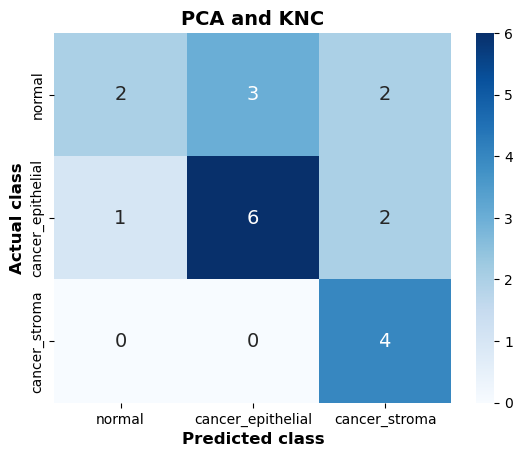

In [ ]:
# Predict y_pred from X_test
y_pred_knc = best_knc_mdl.predict(X_test)

# Recall and precision
knc_recall = recall_score(y_pred_knc, y_test, average="weighted")
knc_precision = precision_score(y_pred_knc, y_test, average="weighted")

# Evaluate score
knc_confusion = confusion_matrix(y_pred_knc, y_test)

# Display confusion matrix with heatmap
sns.heatmap(knc_confusion, annot=True, cmap="Blues", annot_kws={"fontsize": 14})
plt.title("PCA and KNC", fontsize = 14, fontweight = "bold")
plt.xlabel("Predicted class", fontsize = 12, fontweight = "bold")
plt.ylabel("Actual class", fontsize = 12, fontweight = "bold")
plt.xticks(np.arange(3)+0.5, ["normal", "cancer_epithelial", "cancer_stroma"])
plt.yticks(np.arange(3)+0.5, ["normal", "cancer_epithelial", "cancer_stroma"])
plt.show()

# Comparison between models

In [19]:
results = pd.DataFrame({
    "Model": ["Logistic Regression", "SVC", "KNeighborsClassifier"],
    "Best Params": [best_logreg_params, best_svc_params, best_knc_params],
    "Recall": [
        logreg_recall,
        svc_recall,
        knc_recall
    ],
    "Precision": [
        logreg_precision,
        svc_precision,
        knc_precision
    ]
})

results.index = labels

print(results)

                                  Model  \
normal              Logistic Regression   
cancer_epithelial                   SVC   
cancer_stroma      KNeighborsClassifier   

                                                         Best Params  Recall  \
normal                      {'logreg__C': 1, 'pca__n_components': 9}    0.90   
cancer_epithelial                                     {'svc__C': 10}    0.85   
cancer_stroma      {'knc__algorithm': 'auto', 'knc__n_neighbors': 3}    0.60   

                   Precision  
normal              0.916667  
cancer_epithelial   0.891667  
cancer_stroma       0.633333  
